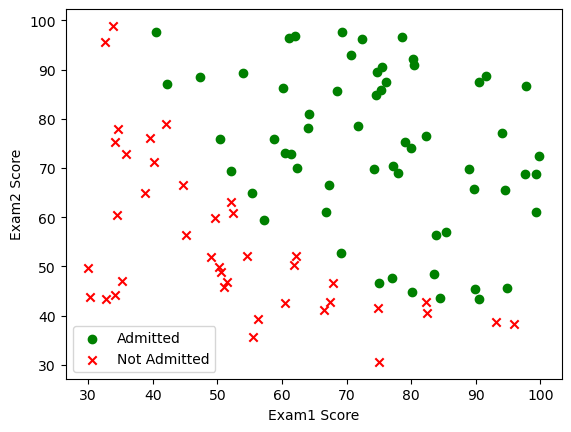

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

exam1_score_label = 'Exam1 Score'
exam2_score_label = 'Exam2 Score'
admitted_label = 'Admitted'
# 读取数据
datas = pd.read_csv("./ex2data1.txt", header=None, names=[exam1_score_label, exam2_score_label, admitted_label])
# 获取数据个数
m = len(datas)
#将数据分类用于绘图
positive = datas[datas[admitted_label].isin([1])]
negative = datas[datas[admitted_label].isin([0])]
# 绘图
plt.scatter(x=positive[exam1_score_label], y=positive[exam2_score_label], marker='o', label='Admitted', color='g')
plt.scatter(x=negative[exam1_score_label], y=negative[exam2_score_label], marker='x', label="Not Admitted", color='r')

plt.legend()
plt.xlabel(exam1_score_label)
plt.ylabel(exam2_score_label)
plt.show()

In [2]:
# 处理数据

# 这个判断防止写脚本的时候多次插入bias行
if 'bias' not in datas.columns:
    datas.insert(0, 'bias', 1)
datas.head()
x = np.matrix(datas.iloc[:, 0:3])
y = np.matrix(datas.iloc[:, 3:4])
# theta = np.matrix(np.zeros(x.shape[1]))
theta = np.zeros((x.shape[1], 1))

In [3]:
# 定义预测函数
def h_fun(x_param, theta_param):
    return sigmoid(x_param @ theta_param)


# 定义sigmoid函数
def sigmoid(z_param):
    return 1 / (1 + np.exp(-z_param))


# 定义损失函数
def j_fun(theta_param, x_param, y_param):
    tmp = h_fun(x_param, theta_param)
    # print(-np.sum(np.multiply(y_param, np.log(tmp)) + np.multiply(1 - y_param, np.log(1 - tmp))) / len(x_param))
    return -(np.sum(np.multiply(y_param, np.log(tmp)) + np.multiply(1 - y_param, np.log(1 - tmp)))) / len(x_param)


# 查看默认theta的损失函数值
last_cost = j_fun(theta, x, y)
print(last_cost)

0.6931471805599453


In [4]:
# 这里对theta重定义是为了方便调试脚本
theta = np.zeros((x.shape[1], 1))


# 自己写梯度下降
def gradient_descent(alpha, iteration, train_x, train_y, train_theta):
    for i in range(iteration):
        tmp = h_fun(train_x, train_theta)
        train_theta = train_theta - (alpha / m) * (train_x.T @ (tmp - train_y))
    return train_theta

#手动进行梯度下降
# theta = gradient_descent(0.004, 300000, x, y, theta)
# print(j_fun(theta, x, y))

In [5]:
# 使用 fminunc 函数来代替自己实现梯度下降
# 由于我们使用的是Python,所以我们使用scipy.optimize库来实现
import scipy.optimize as opt

#重新赋值theta方便调试
theta = np.zeros((x.shape[1], 1))


def cost(theta_param, x_param, y_param):
    #这里为什么要reshape一下呢？因为cost函数在被fmin_tnc调用的时候，传进来的theta_param会变成一个一维数组，然后就会报错tnc: gradient must have shape (len(x0),)
    theta_param = np.reshape(theta_param, (x.shape[1], 1))
    tmp = h_fun(x_param, theta_param)
    return -(np.sum(np.multiply(y_param, np.log(tmp)) + np.multiply(1 - y_param, np.log(1 - tmp)))) / len(x_param)


def gradient(theta_param, x_param, y_param):
    # 这里reshape的原因同上
    theta_param = np.reshape(theta_param, (x.shape[1], 1))
    return (x_param.T @ (h_fun(x_param, theta_param) - y_param)) / len(x_param)


result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))

print(result)
print(cost(result[0], x, y))

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)
0.2034977015894745


In [6]:
# 保存学习参数
theta = result[0]
# 生成待预测成绩
evaluation_x = np.array([1, 45, 85])
# 查看当前模型该成绩的通过率
print(h_fun(evaluation_x, theta))

0.7762906241279501


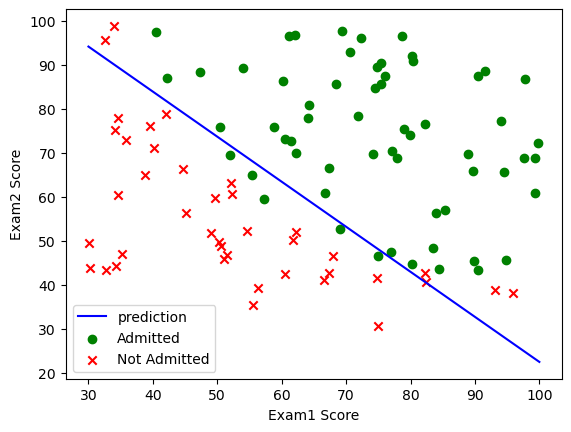

In [11]:
# 画出决策边界
# 为什么决策边界这样子计算呢，因为决策边界就是J(x,theta) = 0 的时候，移项就成了plt_y,具体的解析可以看下面的 '思路'
plt_x = np.linspace(30, 100, 100)
plt_y = (theta[0] + theta[1] * plt_x) / -(theta[2])
plt.plot(plt_x, plt_y, 'b', label='prediction')
# 绘图
plt.scatter(x=positive[exam1_score_label], y=positive[exam2_score_label], marker='o', label='Admitted', color='g')
plt.scatter(x=negative[exam1_score_label], y=negative[exam2_score_label], marker='x', label="Not Admitted", color='r')

plt.legend()
plt.xlabel(exam1_score_label)
plt.ylabel(exam2_score_label)
plt.show()